## Training model

### Preparation

1. Unzip the rearraged dataset attached into a folder named `data_rearranged` in the same directory as this notebook

2. Ensure all the `.py` files (including `model_ic_try3.py`, `train.py` and `model_utils.py`) are in the same directory

3. If running on SUTD's GPU cluster or Colab, all requirements are already satisfied; if running on local machine, install the modules in `requirements.txt` 

4. Run the training on a CUDA-capable machine. Expect to take approximately 30 seconds per epoch (tested on a NVIDIA V100 GPU) or 2.5 minutes per epoch on a NVIDIA K80 GPU

Change the arguments as needed.

To check validation results, you don't need to retrain the model. We have provided a pretrained model (see below)

In [ ]:
!python train.py "./data_rearranged" --epochs 20 --gpu --learning_rate 0.01 

## Validating model

A pretrained model has been provided for validation purposes. This model was trained for 20 epochs with a learning rate of 0.01.

Note: Restart the kernel before rerunning any cell, as `plt.imshow()` loads images into memory and does not delete until forcibly cleared

Testing Accuracy: 0.680
[[5. 0. 3.]
 [0. 4. 4.]
 [0. 1. 8.]]


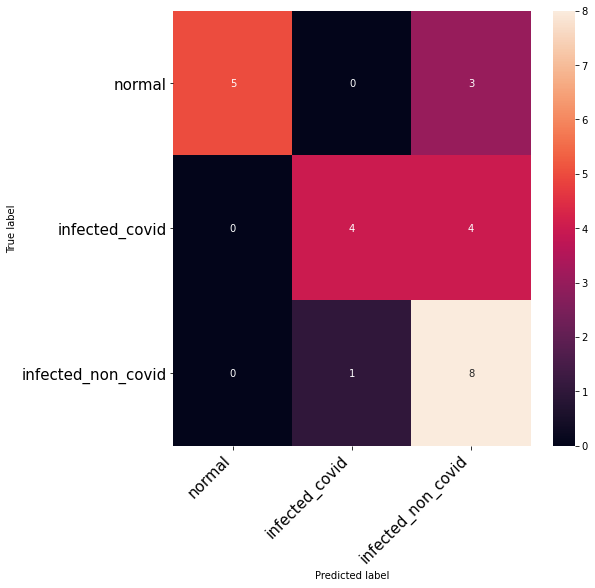

In [11]:
from model_ic_try3 import test_model, load_whole_model
import numpy as np
from model_utils import load_data, read_json
import matplotlib.pyplot as plt
from torchvision import datasets, transforms

trainloader, testloader, validloader, train_data = load_data("./data_rearranged")

model = load_whole_model("./vgg16_adapted_20_epoch.pth")
predictions, truth = test_model(model, testloader)



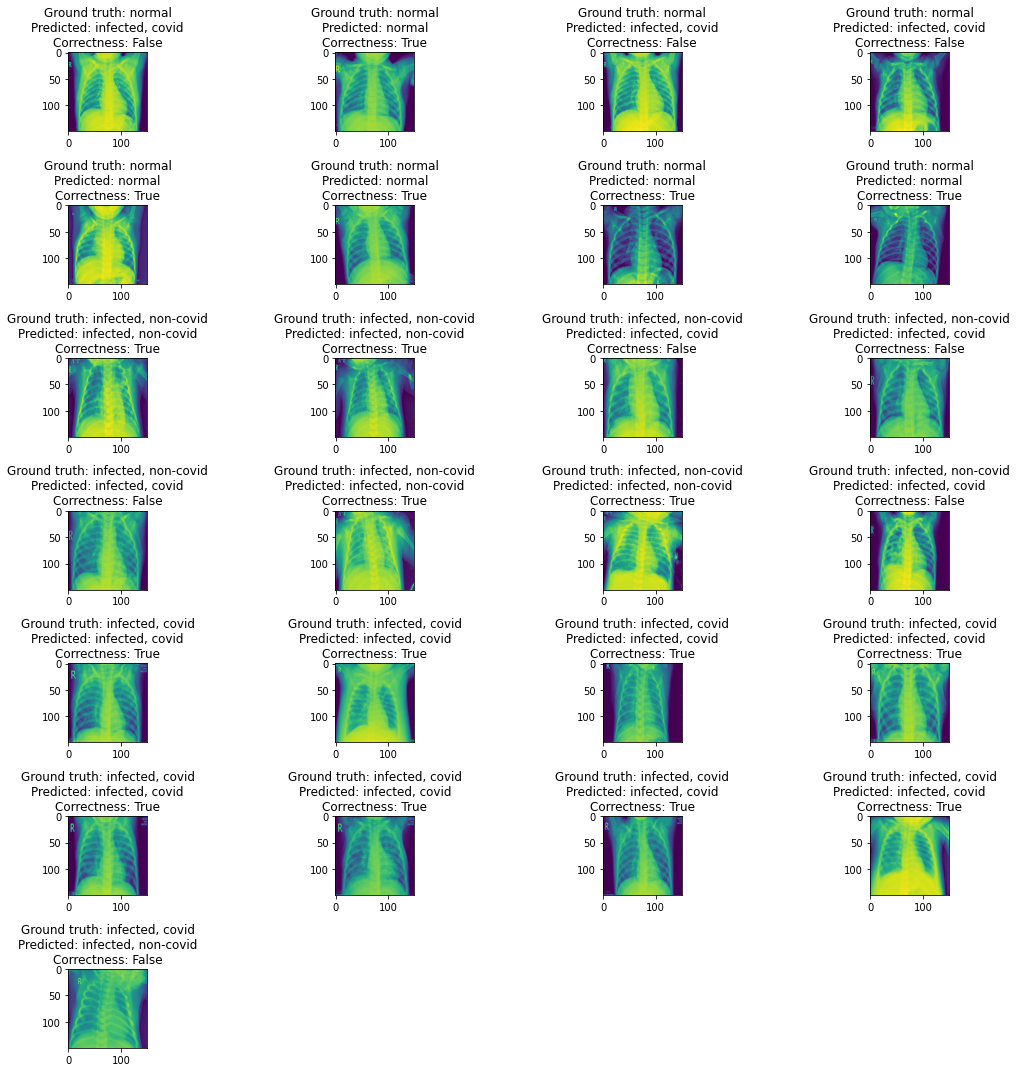

In [12]:
fig=plt.figure(figsize=(15, 15))

columns = 4
rows = 7

class_list = ['normal', 'infected, non-covid', 'infected, covid']

for images, labels in testloader:
    images = images.cpu().detach().numpy()
    
    for count, img in enumerate(images):
        ax = fig.add_subplot(rows, columns, count+1)
        pred_class = predictions[count].cpu().numpy().item()
        truth_class = truth[count].cpu().numpy().item()
        title_text = "Ground truth: {}".format(class_list[truth_class]) + "\n" \
        +"Predicted: {}".format(class_list[pred_class]) + "\n" + "Correctness: {}".format(str(truth_class == pred_class))
        
        ax.title.set_text(title_text)
        plt.imshow(img[0])
        
    fig.tight_layout()
    plt.savefig('validation.png')
    plt.show()


# for i in range(1, columns*rows +1):
#     img = np.random.randint(10, size=(h,w))
#     fig.add_subplot(rows, columns, i)
#     plt.imshow(img)
# plt.show()